# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg then killed 1502 out of 2224 passengers and crew.
 And now I'm observing that the sink of the titanic ship's machine learning algorithm to understand how people survived.
   
<font color = "yellow">
Content:
    
1. [Load and Check Data](#1)
1. [Variable Descriptions](#2)
   * [Univariate Variable Analysis](#3)
     * [Numerical Variable Analysis](#4)
     * [Categorical Variable Analysis](#5)
   
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
 * [Find missing Value](#9)
 * [Fill Missing Value](#10)
1. [Visualization](#11)
 * [Correlation Between SibSp -- ParCh -- Age -- Fare -- Survived](#12)
 * [SibSp -- Survived](#13)
 * [Parch -- Survived](#14)
 * [Pclass -- Survived](#15)
 * [Age -- Survive](#16)
 * [Pclass -- Survived -- Age](#17)
 * [Embarked -- Sex -- Pclass --Survived](#18)
 * [Embarked -- Sex -- Fare -- Survived](#19)
 * [Filling Missing Age Value](#20)
 
1. [Feauture Engineering](#21)
 * [Name -- Title](#22)
 * [Family Size](#23)
 * [Embarked](#24)
 * [Ticket](#25)
 * [Pclass](#26)
 * [Sex](#27)
 * [Drop Passenger Id and Cabin](#28)
1. [Modeling](#29)
 * [Train Test Split](#30)
 * [Simple Logistic Regresiion](#31)
 * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
 * [Ensemble Modeling](#33)
 * [Prediction and Submission](#34)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

plt.style.use("seaborn-colorblind")
plt.style.use("seaborn-whitegrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id ="1"></a><br>
# 1-Load and Check Data

In [2]:
#=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_passengerId = test_df["PassengerId"]


<a id = "2" ></a><br>
# 2- Variable Descriptions

1. PassengerId : id of passenger
1. Survived: if died :0 ,lived :1
1. Pclass: passenger class
1. Name: name of passenger
1. Sex: gender of passenger
1. Age: age of passenger
1. SibSp: Sib means siblings, Sp means spouses
1. Parch: par means parents, ch means children
1. Ticket: ticket number of passenger
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherburg, S =Southhampton, Q=Queenstown


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2):Age, Fare
* int64(5):PassengerID,Survived,PClass,SibSp,Parch
* object(5):Name,Sex,Ticket,Cabin,Embarked

<a id="3" ></a><br>
# 2-a)Univarite Variable Analysis
* Categorical Variable Analysis : Survived, Sex, Pclass,Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable Analysis : Fare, age and passengerId

<a id="4" ></a><br>
# 2-a-i)Categorical Variable Analysis

In [4]:
def bar_plot(variable):
    
    """
    input: varible exmple: "sex"
    output: bar plot& value count
    """
    
    # get feature
    var = train_df[variable]
    
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("The {} is: \n {}".format(variable,varValue))    
    

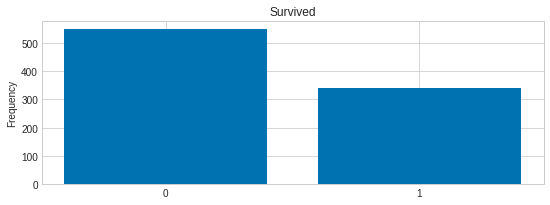

The Survived is: 
 0    549
1    342
Name: Survived, dtype: int64


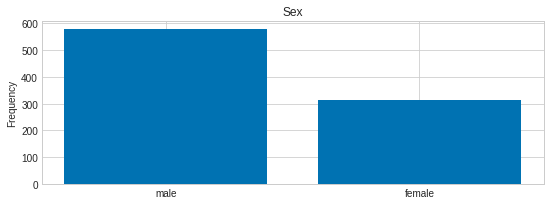

The Sex is: 
 male      577
female    314
Name: Sex, dtype: int64


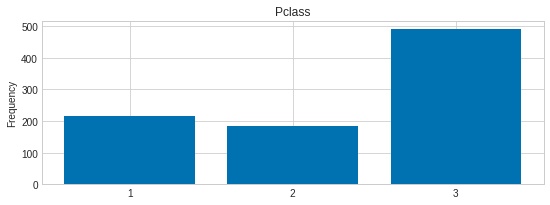

The Pclass is: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


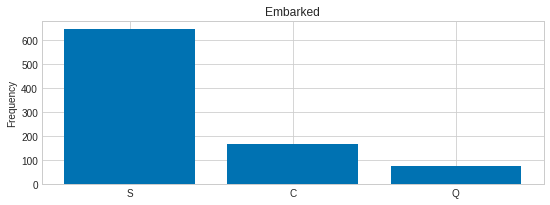

The Embarked is: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


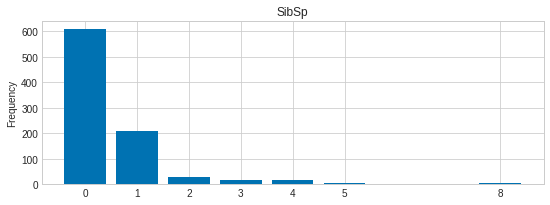

The SibSp is: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


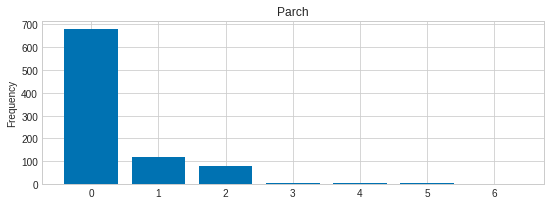

The Parch is: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [5]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)
    

In [6]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
E50            1
B39            1
D21            1
D7             1
E40            1
Name: Cabin, Length: 147, dtype: int64 

Moran, Mr. Daniel J                              1
Bidois, Miss. Rosalie                            1
Collyer, Mrs. Harvey (Charlotte Annie Tate)      1
Mockler, Miss. Helen Mary "Ellie"                1
Hogeboom, Mrs. John C (Anna Andrews)             1
                                                ..
Shelley, Mrs. William (Imanita Parrish Hall)     1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")    1
Charters, Mr. David                              1
Rekic, Mr. Tido                                  1
Heininen, Miss. Wendla Maria                     1
Name: Name, Length: 891, dtype: int64 

1601                 7
347082               7
CA. 2343             7
CA 2144              6
347088               6
                    ..
SC/PARIS 2133        1
113050    

<a id="5"></a><br>
# 2-a-ii)Numerical Variable Analysis

In [7]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable],bins=80)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

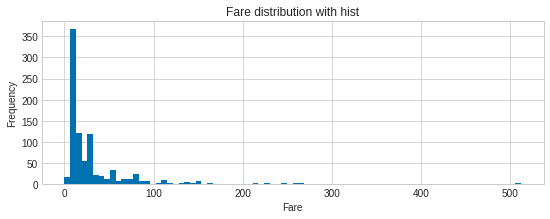

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


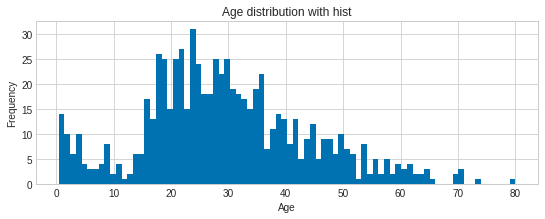

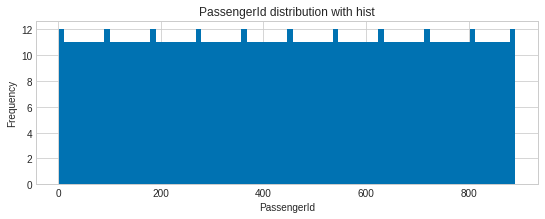

In [8]:
numVar = ["Fare","Age","PassengerId"]
for n in numVar:
    plot_hist(n)
    

<a id="6"></a><br>
# 3-Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [9]:
# Pclass - Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# Sex -Survived

train_df[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean().sort_values(by="Survived",ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# SibSp - Survived

train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index =False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
#Parc-Survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
#Parch-SibSp -Survived
train_df[["Parch","SibSp","Survived"]].groupby(["Parch","SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,SibSp,Survived
16,3,0,1.000000
3,0,3,1.000000
18,3,2,1.000000
6,1,2,0.857143
9,2,0,0.724138
4,1,0,0.657895
10,2,1,0.631579
5,1,1,0.596491
1,0,1,0.520325
11,2,2,0.500000


In [14]:
#Fare and Survived correlation
train_df[["Fare","Survived"]].groupby(["Fare"],as_index=False).mean().sort_values(by= "Survived",ascending= False)


,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


In [15]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="7"></a><br>
# 4-Outlier Detection

In [16]:
def detectOutliers(df,features):
    outlier_indices = []
    for i in features:
        #1st quartile
        Q1 = np.percentile(df[i],25)
        #3rd quartile
        Q3 = np.percentile(df[i],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier_step
        outlierStep = IQR * 1.5
        # detect oulier and their indeces
        outlier_listCol = df[((df[i] < Q1 - outlierStep)| (df[i] > Q3 + outlierStep))].index
        outlier_indices.extend(outlier_listCol)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,k in outlier_indices.items() if k>2)
    
    return multiple_outliers

In [17]:
train_df.loc[detectOutliers(train_df,["Age","SibSp","Parch","Fare"])]
train_df = train_df.drop(detectOutliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="8" ></a><br>
# 5- Missing Value
   * Find Missing Value
   * Fill Missing Value

In [18]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


<a id="9"></a><br>
## 5-a)Find Missing Value

In [19]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [20]:
train_df.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

<a id="10"></a><br>
## 5-b)Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1


In [21]:
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


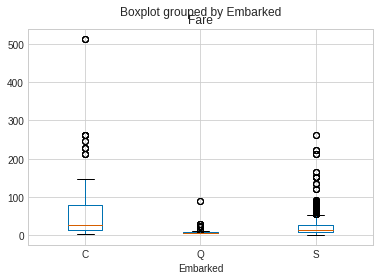

In [22]:
train_df.boxplot(column = "Fare",by="Embarked")
plt.show()

In [23]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [24]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [25]:
train_df["Fare"] = train_df["Fare"].fillna(train_df[train_df["Pclass"]==3]["Fare"].mean())

In [26]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


<a id="11" ></a><br>
# 6- Visualization

<a id="12" ></a><br>
## 6-a) Correlation Between SibSp -- ParCh -- Age -- Fare -- Survived

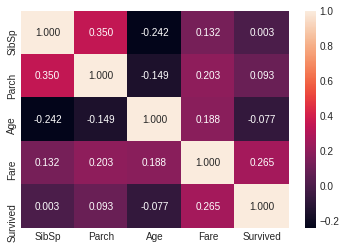

In [27]:
#seaborn
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot = True,fmt = ".3f")

Fare feature seems to have correlation with survived feature (0.265)

<a id = "13"></a><br>
## 6-b) SibSp -- Survived

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


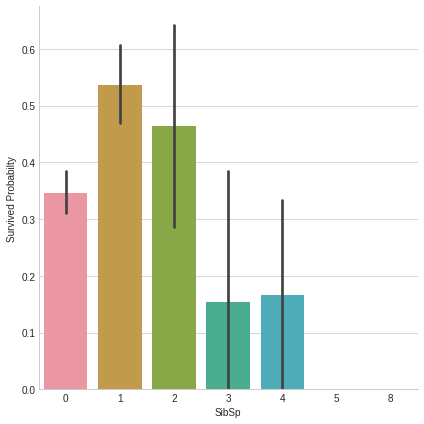

In [28]:
g = sns.factorplot(x="SibSp",y = "Survived",data = train_df,kind = "bar",size = 6)
g.set_ylabels("Survived Probabilty")
plt.show()

* Having a lot of SibSp have less chance to survive
* If sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories

<a id = "14"></a><br>
## 6-c) ParCh -- Survived

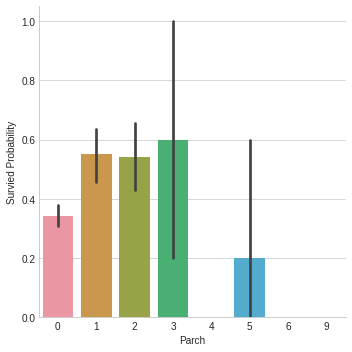

In [29]:
g = sns.factorplot(x= "Parch",y= "Survived",data = train_df,kind="bar",size=5)
g.set_ylabels("Survied Probability")
plt.show()

* Sibsp and parch can be used for new feature extraction with th = 3
* small families have more chance to survive
* there is a standard deviation in survival of passenger with parch=3

<a id="15"></a><br>
## 6-d) Pclass -- Survived

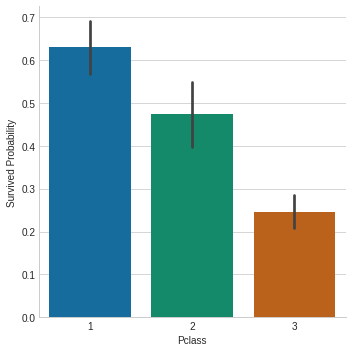

In [30]:
g = sns.factorplot(x= "Pclass",y = "Survived",data =train_df,kind = "bar",size= 5)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16" ></a><br>
## 6-e) Age -- Survived

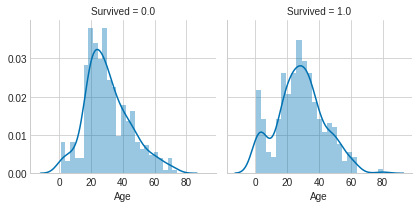

In [31]:
g = sns.FacetGrid(train_df,col = "Survived")
g.map(sns.distplot,"Age",bins = 25)
plt.show()

* age <=10 has a high surviva rate
* the oldest passengers (80) survived
* large number of 20 years old didnt survive
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id="17"></a><br>
## 6-f) Pclass -- Survived -- Age

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


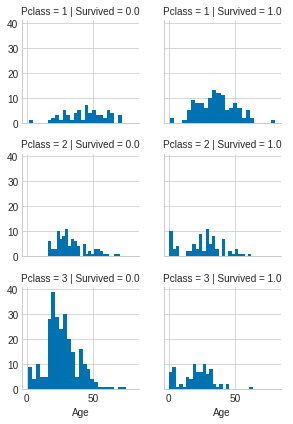

In [32]:
g = sns.FacetGrid(train_df,col = "Survived",row="Pclass",size = 2)
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show()

<a id="18"></a><br>
## 6-g)Embarked -- Sex -- Pclass -- Survived


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


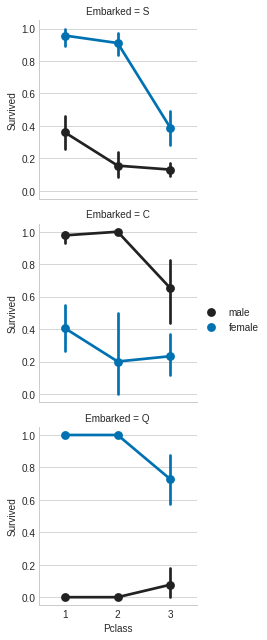

In [33]:
g = sns.FacetGrid(train_df,row = "Embarked",size = 3)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males
* males have better survival rate in pclass 3 in C
* embarked ans sex will be used in training

<a id = "19" ></a> <br>
## 6-h) Embarked -- Sex -- Fare -- Survived

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


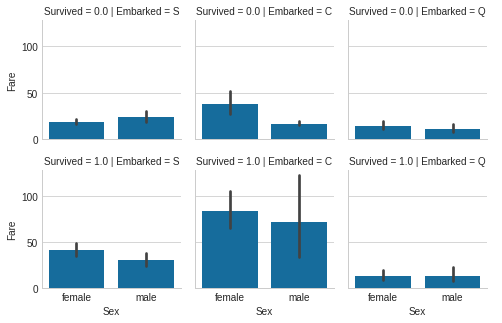

In [34]:
g = sns.FacetGrid(train_df,col = "Embarked",row = "Survived",size = 2.3)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

* Passengers who pay higher fare have better survival. Fare can be used as categorical for training

<a id ="20"></a><br>
## 6-i)Filling Missing Age Value

In [35]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
27,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1291,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


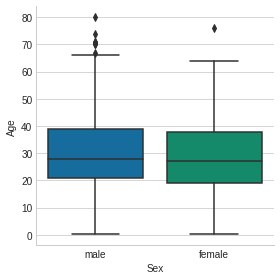

In [36]:
sns.factorplot(x = "Sex",y="Age",data = train_df,kind="box",size = 4)
plt.show()

Sex is not informative for age prediction, age distribution seems to be same

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


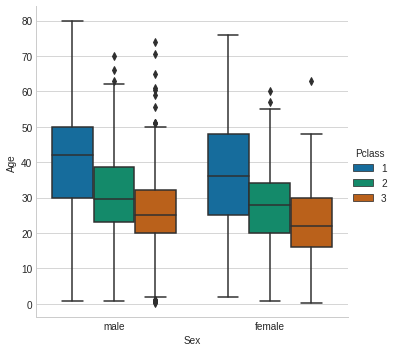

In [37]:
sns.factorplot(x = "Sex",y = "Age",hue= "Pclass",data = train_df ,kind = "box",size = 5)
plt.show()

First class passengers are older than second . and seconds are older than third class passengers

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update

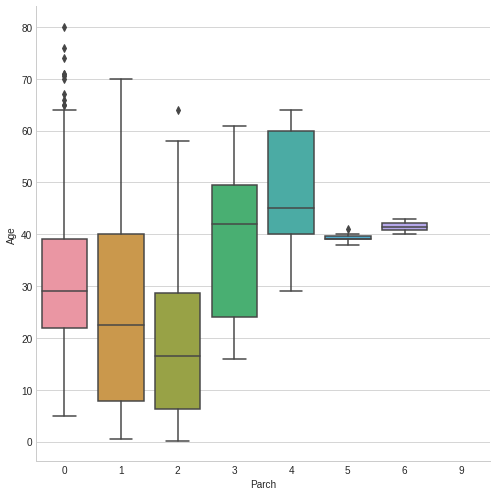

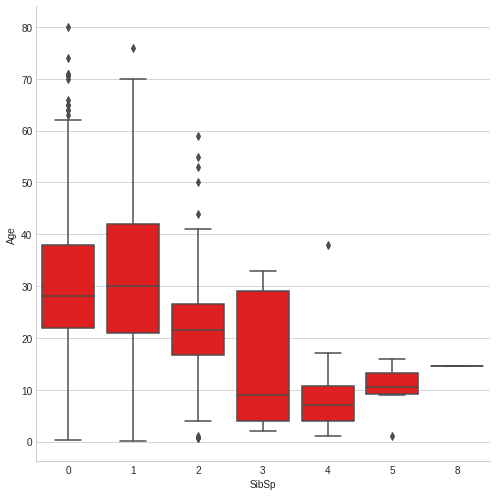

In [38]:
sns.factorplot(x = "Parch",y = "Age",data = train_df,kind = "box",size = 7)
sns.factorplot(x = "SibSp",y = "Age",data= train_df,color = "red",kind = "box",size = 7)
plt.show()

In [39]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]


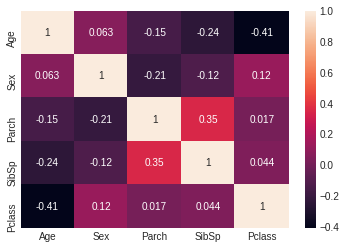

In [40]:
sns.heatmap(train_df[["Age","Sex","Parch","SibSp","Pclass"]].corr(),annot = True)
plt.show()

Age is not correlated with sex but correalated with Parch, SibSp, and Pclass

In [41]:
index_nan_age = list(train_df[train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][(train_df["Parch"]==train_df.iloc[i]["Parch"]) & (train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"])].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
train_df["Age"][train_df["Age"].isnull()]

Series([], Name: Age, dtype: float64)

<a id ="21"></a><br>
## 7) Feature Engineering

<a id ="22"></a><br>
## 7-a) Name -- Title

In [43]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [44]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

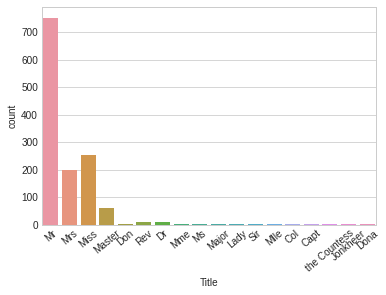

In [45]:
sns.countplot(x = "Title",data = train_df)
plt.xticks(rotation = 40)
plt.show()

In [46]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Jonkheer","Dona","Major","Dr","Rev","Don","Sir","Col"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Mrs" or i== "Mlle" or i == "Ms" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

In [47]:
train_df["Title"].head(13)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
Name: Title, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


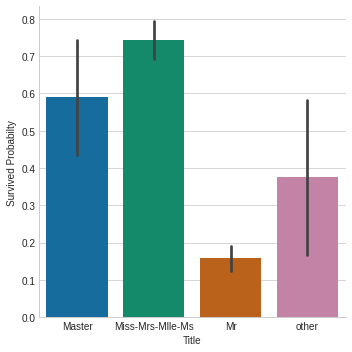

In [48]:
g = sns.factorplot(x = "Title" , y = "Survived" , data = train_df,kind = "bar",size=5)
g.set_xticklabels(["Master","Miss-Mrs-Mlle-Ms","Mr","other"])
g.set_ylabels("Survived Probabilty")
plt.show()

In [49]:
train_df.drop(labels = ["Name"],axis = 1,inplace = True)


In [50]:
train_df = pd.get_dummies(train_df,columns = ["Title"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0


<a id = "23" ></a><br>
## 7-b) Family Size

In [51]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [52]:
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1


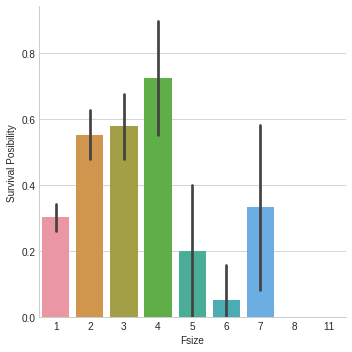

In [53]:
g = sns.factorplot(x= "Fsize", y = "Survived", data = train_df, kind = "bar", size = 5)
g.set_ylabels("Survival Posibility")
plt.show()

In [54]:
train_df["family_size"] = [1 if i<5 else 0 for i in train_df["Fsize"]]

In [55]:
train_df.head(15)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,1
5,25.0,NaN,Q,8.4583,0,6,3,1,0,0.0,330877,0,0,1,0,1,1
6,54.0,E46,S,51.8625,0,7,1,1,0,0.0,17463,0,0,1,0,1,1
7,2.0,NaN,S,21.0750,1,8,3,1,3,0.0,349909,1,0,0,0,5,0
8,27.0,NaN,S,11.1333,2,9,3,0,0,1.0,347742,0,1,0,0,3,1
9,14.0,NaN,C,30.0708,0,10,2,0,1,1.0,237736,0,1,0,0,2,1


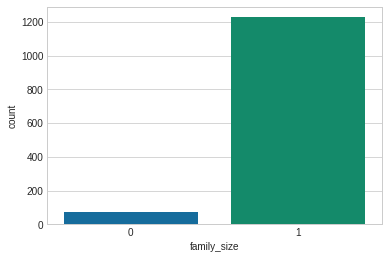

In [56]:
sns.countplot(x = "family_size",data = train_df)
plt.show()

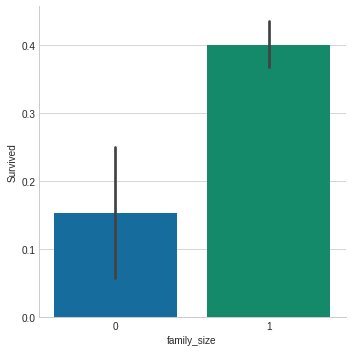

In [57]:
g = sns.factorplot(x = "family_size",y = "Survived", data = train_df,kind="bar",size=5)

Small families have more chances to survive than large families

In [58]:
train_df = pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1


<a id = "24"></a><br>
## 7-c) Embarked

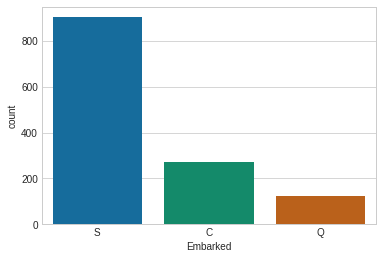

In [59]:
g = sns.countplot(x = "Embarked",data = train_df)
plt.show()

In [60]:
train_df = pd.get_dummies(train_df,columns = ["Embarked"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1,0,0,1


<a id ="25"></a><br>
## 7-d) Ticket

In [61]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [62]:
liste = []
for i in train_df["Ticket"]:
    if not i.isdigit():
        liste.append(i.replace("."," ").replace("/"," ").strip().split(" ")[0])
    else:
        liste.append("X")
train_df["Ticket"] = liste

In [63]:
train_df = pd.get_dummies(train_df,columns = ["Ticket"],prefix = "T")


In [64]:
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title_0,...,T_S,T_SC,T_SCO,T_SO,T_SOTON,T_STON,T_SW,T_W,T_WE,T_X
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,0,2,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
3,35.0,C123,53.1000,0,4,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


<a id="26"></a><br>
## 7-e) Pclass

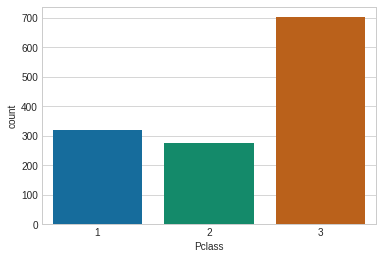

In [65]:
g = sns.countplot(x = "Pclass",data = train_df)
plt.show()

In [66]:
train_df = pd.get_dummies(train_df, columns = ["Pclass"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_0,Title_1,...,T_SO,T_SOTON,T_STON,T_SW,T_W,T_WE,T_X,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,7.2500,0,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,0,2,0,1,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,NaN,7.9250,0,3,0,0,1.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,35.0,C123,53.1000,0,4,0,1,1.0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,NaN,8.0500,0,5,1,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id ="27" ></a><br>
## 7-f) Sex

In [67]:
train_df["Sex"] = train_df [ "Sex"].astype("category")
train_df = pd.get_dummies(train_df,columns = ["Sex"])

In [68]:
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Survived,Title_0,Title_1,Title_2,...,T_STON,T_SW,T_W,T_WE,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,NaN,7.2500,0,1,1,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,38.0,C85,71.2833,0,2,1,1.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,26.0,NaN,7.9250,0,3,0,1.0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,35.0,C123,53.1000,0,4,1,1.0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,35.0,NaN,8.0500,0,5,0,0.0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a><br>
## 7-g)Drop Passenger ID and Cabin

In [69]:
train_df.drop(labels = ["PassengerId","Cabin"],axis = 1,inplace = True)

In [70]:
train_df.head()

,Age,Fare,Parch,SibSp,Survived,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STON,T_SW,T_W,T_WE,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,7.2500,0,1,0.0,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,38.0,71.2833,0,1,1.0,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,26.0,7.9250,0,0,1.0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,35.0,53.1000,0,1,1.0,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,35.0,8.0500,0,0,0.0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id= "29"></a><br>
# 8)Modeling

In [71]:
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


<a id ="30"></a><br>
## 8-a)Train Test Split

In [72]:
train_df_len

881

In [73]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1,inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
test.head()

,Age,Fare,Parch,SibSp,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STON,T_SW,T_W,T_WE,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,7.8292,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,7.0000,0,1,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,9.6875,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,8.6625,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,12.2875,1,1,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [75]:
train = train_df[:train_df_len]
X_train = train.drop(labels= "Survived",axis = 1)
y_train = train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.33,random_state =42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id = "31"></a><br>
## 8-b) Simple Logistic Regression

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train,y_train)* 100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.54
Testing Accuracy: % 82.82


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id="32"></a><br>
## 8-c) Hyperparameter Tuning - GridSearch - CrossValidation

 We Will compare 5 machine learning classifier and evaluate mean accuracy of each of them by stratified Cross validation
* DECISION TREE
* SWM 
* RANDOM FOREST
* KNN
* LOGISTIC REGRESSION

In [77]:
random_state = 42
# All the classifiers are listed in classifier[] like this:
classifier = [DecisionTreeClassifier( random_state = random_state),
             SVC(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]
#Decision Tree Classifier parameters are Min Samples split, and Max Depth
dt_param_grid = {"min_samples_split": range(10,500,20),
                "max_depth": range(1,20,2)}
#SVC parameters are: Kernel, Gamma, and C
svc_param_grid = {"kernel":["rbf"],
                 "gamma": [ 0.001,0.01,0.1,1],
                 "C":[1,10,50,100,200,300,1000]}
#Random Forest Classifier parameters are max_feature,min_samples_split,min_samples_leaf,bootstrap,n_estimators,criterion:
rf_param_grid = {"max_features":[1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,200],
                "criterion":["gini"]}
# Logistic Regression Parameters are C, Penalty
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty":["l1","l2"]}
# KNNeighbors parameters are n_neighbors,weights,metric
knn_param_grid = {"n_neighbors": np.linspace(1,19,10,dtype = int).tolist(),
                 "weights": [ "uniform","distance"],
                 "metric":["euclidean","manhattan"]}

# All of below parameters grids are listed on classifier_param
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                    knn_param_grid]

In [78]:
cv_result = []
best_estimator = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],param_grid = classifier_param[i],cv = StratifiedKFold(n_splits = 10),scoring = "accuracy",n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimator.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8305084745762713
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7949152542372881
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   53.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s


0.7813559322033898


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


Text(0.5, 1.0, 'Cross Validation Scores')

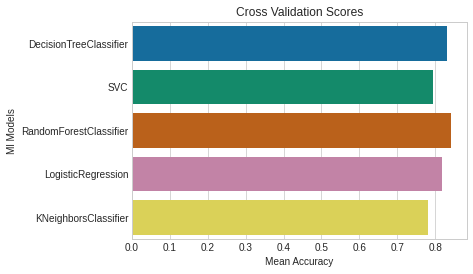

In [79]:
#Visualization of the cross validation results
cv_results = pd.DataFrame({"Cross Validation Means": cv_result,"Ml Models": [ "DecisionTreeClassifier","SVC","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})
g = sns.barplot("Cross Validation Means","Ml Models",data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33" ></a><br>
## 8-d) Emsemble Modeling

In [80]:
votingC =  VotingClassifier(estimators = [("dt",best_estimator[0]),
                                         ("rfc",best_estimator[2]),
                                         ("lr",best_estimator[3])],voting = "soft",n_jobs = -1)
votingC = votingC.fit(X_train,y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8213058419243986


<a id = "34" ></a><br>
## 8-e) Prediction and Submission

In [81]:
test_survived = pd.Series(votingC.predict(test),name = "Survived").astype(int)
results = pd.concat([test_passengerId, test_survived],axis = 1)
results.to_csv("titanic_hidircan.csv",index = False)